In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
from numpy import *
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils import to_categorical
%matplotlib inline

Next I want to tell the program where I have saved the data, and where I want it to save the processed images

In [17]:
path1 = os.path.abspath(os.path.join('/Users', 'azamsaied', 'Desktop', 'Machine Learning Project', 'Coding resourses', 'Raw Data'))
path2 = os.path.abspath(os.path.join('/Users', 'azamsaied', 'Desktop', 'Machine Learning Project', 'Coding resourses', 'Processed pics'))
pic_size = 256, 256

You don't have to run this next cell every time when building - it's time consuming

Resize all the images, make them black and white, save them all as '.png'

In [18]:
listing = os.listdir(path1)
num_samples = size(listing)
print("Number of images in folder:", num_samples)
for file in listing:
    if (file != '.DS_Store' and file[-7:] != '.icloud'): #weird files keep appearing in this folder
        im = Image.open(path1 + '/' + file)
        img = im.resize(pic_size)
        gray = img.convert('L')
        #Maybe don't run this line every time when building....as it's quite slow
        gray.save(path2 + '/' + file, "png")

Number of images in folder: 391


This is our prize - a list of processed images

In [19]:
imlist = os.listdir(path2)

Lets try to view some of these images...

Lets choose an image and print it:

In [20]:
#Like this:
image = mpimg.imread(path2 + '/' + 'Wrist 13.png')

[[0.         0.         0.28235295 ... 0.         0.         0.        ]
 [0.         0.         0.2784314  ... 0.         0.         0.        ]
 [0.         0.         0.28235295 ... 0.18039216 0.2        0.22352941]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(256, 256)


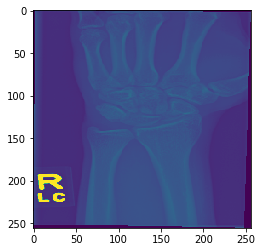

In [21]:
print(image)
print(image.shape)
imgplot = plt.imshow(image)

Next we create a dictionary where the keys are the filenames, and the values are the processed images flattened into arrays

In [22]:
image_dict = {}
print("Image dictionary:")
for im2 in imlist:
    if im2 != '.DS_Store':
        img_as_flat_array = np.array(Image.open(path2 + '/' + im2))
        img_as_flat_array = img_as_flat_array.flatten()
        img_as_flat_array = img_as_flat_array.astype(int)
        image_dict.update({im2 : img_as_flat_array})
print(image_dict)

Image dictionary:
{'Hand 11.png': array([105, 102,  84, ...,  61,  63,  64]), 'Finger 7.png': array([0, 0, 0, ..., 0, 0, 0]), 'Ankle AP 5.png': array([0, 0, 0, ..., 0, 0, 0]), 'Elbow 12 c.png': array([ 8,  8, 10, ..., 47, 47, 47]), 'Wrist 14.png': array([ 99, 100, 102, ..., 132, 110, 105]), 'Elbow 3.png': array([ 0,  0,  0, ..., 63, 63, 63]), 'Finger 20.png': array([105, 105, 105, ..., 104, 104,   0]), 'Foot 10 l.png': array([25, 25, 25, ..., 85, 85, 85]), 'Knee AP 22.png': array([17, 15, 15, ...,  2,  2,  2]), 'Wrist 3.png': array([ 91,  94, 101, ..., 120, 104,  98]), 'Shoulder 5.png': array([11, 11, 11, ..., 11, 10, 12]), 'Elbow 12.png': array([37, 33, 33, ..., 34, 27, 34]), 'Foot 8.png': array([0, 0, 0, ..., 0, 0, 0]), 'Foot 9.png': array([0, 0, 0, ..., 0, 0, 0]), 'Elbow 13.png': array([0, 0, 0, ..., 0, 0, 0]), 'Shoulder 4.png': array([0, 0, 0, ..., 0, 0, 0]), 'Wrist 2.png': array([4, 4, 4, ..., 3, 4, 4]), 'Knee AP 23.png': array([12, 12, 12, ..., 12, 12, 12]), 'Foot 10 m.png': arra

For this workbook, I want a dictionary of the filenames (keys) and a y-label with a single number - whether the humerous is present or not

In [23]:
xray_labels = pd.read_csv('/Users/azamsaied/Desktop/Machine Learning Project/Coding resourses/y_labels_binary.csv')

#Lets ensure consistency with our filename endings:
for i in range(len(xray_labels.index)):
    xr_name = str(xray_labels.iloc[i,0])
    if xr_name[-4:] != '.png':
        nn = xr_name+'.png'
        xray_labels.replace(xr_name, nn, inplace=True)

In [24]:
#Lets make a quick dictionary of humerus labels
x_ray = xray_labels['x-ray']
humerus = xray_labels['Humerus']     
humerus_dictionary = {}
for i in range(len(x_ray)):
    humerus_dictionary.update({x_ray[i]:humerus[i]})
print(humerus_dictionary)

{'Ankle AP 1.png': 0, 'Ankle AP 10.png': 0, 'Ankle AP 11.png': 0, 'Ankle AP 12.png': 0, 'Ankle AP 13.png': 0, 'Ankle AP 14.png': 0, 'Ankle AP 15.png': 0, 'Ankle AP 16.png': 0, 'Ankle AP 17.png': 0, 'Ankle AP 18.png': 0, 'Ankle AP 19.png': 0, 'Ankle AP 2.png': 0, 'Ankle AP 20.png': 0, 'Ankle AP 21.png': 0, 'Ankle AP 22.png': 0, 'Ankle AP 23.png': 0, 'Ankle AP 3.png': 0, 'Ankle AP 4.png': 0, 'Ankle AP 5.png': 0, 'Ankle AP 6.png': 0, 'Ankle AP 7.png': 0, 'Ankle AP 8.png': 0, 'Ankle AP 9.png': 0, 'Ankle Lat 1.png': 0, 'Ankle Lat 10.png': 0, 'Ankle Lat 11.png': 0, 'Ankle Lat 12.png': 0, 'Ankle Lat 13.png': 0, 'Ankle Lat 14.png': 0, 'Ankle Lat 15.png': 0, 'Ankle Lat 16.png': 0, 'Ankle Lat 17.png': 0, 'Ankle Lat 18.png': 0, 'Ankle Lat 19.png': 0, 'Ankle Lat 2.png': 0, 'Ankle Lat 20.png': 0, 'Ankle Lat 21.png': 0, 'Ankle Lat 3.png': 0, 'Ankle Lat 4.png': 0, 'Ankle Lat 5.png': 0, 'Ankle Lat 6.png': 0, 'Ankle Lat 7.png': 0, 'Ankle Lat 8.png': 0, 'Ankle Lat 9.png': 0, 'Elbow 1.png': 1, 'Elbow 10.

Now we create a Train / Test split:

In [25]:
X = []
y = []
keys = list(image_dict.keys())
for key in keys:
    X.append(image_dict[key])
    y.append(humerus_dictionary[key])
#Life gets a little easier if X and y are np arrays (lets us change type of number)
X = np.array(X).astype('float32')
X = X / 255
y = np.array(y).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)
print("X train:", X_train)
print("X_test:", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
X_train = X_train.reshape((-1, 256, 256, 1))
X_test = X_test.reshape((-1, 256, 256, 1))
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("y.shape: ", y.shape)
X = X.reshape((-1, 256, 256, 1))
print(X.shape)

X train: [[0.02745098 0.02745098 0.02352941 ... 0.02745098 0.02745098 0.02352941]
 [0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01176471]
 [0.32156864 0.32156864 0.32156864 ... 0.22745098 0.22745098 0.22745098]
 ...
 [0.8039216  0.8039216  0.8039216  ... 0.8039216  0.8039216  0.8039216 ]
 [0.09411765 0.09411765 0.16078432 ... 0.3137255  0.3372549  0.3372549 ]
 [0.09803922 0.09803922 0.09803922 ... 0.02745098 0.02745098 0.02745098]]
X_test: [[0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01960784]
 [0.73333335 0.38039216 0.17254902 ... 1.         0.99215686 0.9843137 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08235294 0.08235294 0.08235294 ... 0.07843138 0.07843138 0.07843138]
 [0.14117648 0.1254902  0.1254902  ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.6313726  0.6039216  0.63529414]]
y_train:  [0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0

In [26]:
y = to_categorical(y)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

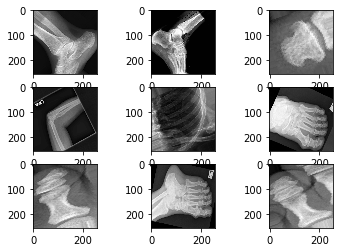

In [27]:
#Practice manipulating and printing images
datagen = ImageDataGenerator(rotation_range=180)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(256, 256), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [28]:
#Lets run our model on non-augmented images
batch_size = 52
epochs = 4
num_classes = 1 #Number of possible bones as an output

In [29]:
#Build the model
bone_rec_model = Sequential()
bone_rec_model.add(Conv2D(128, kernel_size = (4, 4), input_shape=(256, 256, 1), strides = 2, activation = 'relu'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Conv2D(64, (3, 3)))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model.add(Dropout(0.5))
bone_rec_model.add(Conv2D(32, (3, 3), padding='same'))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Conv2D(16, (3, 3)))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model.add(Dropout(0.5))
bone_rec_model.add(Flatten())
bone_rec_model.add(Dense(16))
bone_rec_model.add(LeakyReLU(alpha=0.1))
bone_rec_model.add(Dropout(0.5))
bone_rec_model.add(Flatten())
bone_rec_model.add(Dense(2, activation='softmax'))

In [30]:
#Compile the model - using BINARY CROSS ENTROPY
bone_rec_model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
bone_rec_model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x1a2f287a58>>

In [ ]:
#Train the model
bone_rec_train = bone_rec_model.fit(X, y, validation_split = 0.2, batch_size=batch_size, epochs=epochs, verbose=1,)

(391, 256, 256, 1)
Train on 312 samples, validate on 79 samples
Epoch 1/4
312/312 [==============================] - 214s 686ms/step - loss: 0.5167 - acc: 0.7596 - val_loss: 0.5213 - val_acc: 0.7089
Epoch 2/4
312/312 [==============================] - 198s 636ms/step - loss: 0.4923 - acc: 0.7821 - val_loss: 0.5291 - val_acc: 0.7089
Epoch 3/4
 52/312 [====>.........................] - ETA: 3:13:25 - loss: 0.4155 - acc: 0.8077

Now we will try ImageDataGenerator - using flow from dataframe

In [ ]:
df=pd.read_csv('/Users/azamsaied/Desktop/Machine Learning Project/Coding resourses/y_labels_binary.csv')
datagen=ImageDataGenerator(validation_split = 0.2, horizontal_flip = True, rotation_range = 360)#(rescale=1./255)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory=os.path.abspath(os.path.join('/Users', 'azamsaied', 'Desktop', 'Machine Learning Project', 'Coding resourses', 'Processed pics')), x_col="x-ray", y_col="Humerus", class_mode="binary", target_size=(256,256), batch_size=100, color_mode = 'grayscale')
valid_generator=datagen.flow_from_dataframe(dataframe=df, directory=os.path.abspath(os.path.join('/Users', 'azamsaied', 'Desktop', 'Machine Learning Project', 'Coding resourses', 'Processed pics')), x_col="x-ray", y_col="Humerus", class_mode="binary", target_size=(256,256), batch_size=batch_size, color_mode = 'grayscale')

#build the new model
bone_rec_model_aug = Sequential()
bone_rec_model_aug.add(Conv2D(128, kernel_size = (4, 4), input_shape=(256, 256, 1), strides = 2, activation = 'relu'))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(Conv2D(64, (3, 3)))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model_aug.add(Dropout(0.5))
bone_rec_model_aug.add(Conv2D(32, (3, 3), padding='same'))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(Conv2D(16, (3, 3)))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(MaxPooling2D(pool_size=(2, 2)))
bone_rec_model_aug.add(Dropout(0.5))
bone_rec_model_aug.add(Flatten())
bone_rec_model_aug.add(Dense(16))
bone_rec_model_aug.add(LeakyReLU(alpha=0.1))
bone_rec_model_aug.add(Dropout(0.5))
bone_rec_model_aug.add(Flatten())
bone_rec_model_aug.add(Dense(1, activation='softmax'))

#Compile the model
bone_rec_model_aug.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

STEP_SIZE_TRAIN=0.8*len(df)//batch_size
print(STEP_SIZE_TRAIN)
STEP_SIZE_VALID=0.2*len(df)//batch_size
print(STEP_SIZE_VALID)
bone_rec_model_aug.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)

Found 390 images belonging to 2 classes.
Found 390 images belonging to 2 classes.
6.0
1.0
Epoch 1/4
2/6 [=========>....................] - ETA: 21:46 - loss: 12.2756 - acc: 0.2300